<a href="https://colab.research.google.com/github/Mauro2393/Work/blob/main/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install


In [18]:
pip install yfinance

# Import

In [36]:
import yfinance as yf
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data
from google.colab import files

# Importa Ticker da Excel

In [60]:
# Carica il file Excel
uploaded = files.upload()

# Ottieni il nome del file caricato
file_name = list(uploaded.keys())[0]

# Estrai la colonna 'Ticker' dal DataFrame
ticker_list = pd.read_excel(file_name,sheet_name='Foglio1',index_col=0).T

ticker_list = ticker_list.columns.tolist()


Saving Ticker.xlsx to Ticker (5).xlsx


# Time Frame

In [58]:
start_date = "2023-12-31"  # Data di inizio
end_date = "2024-03-01"  # Data di fine

# Weights


In [65]:
# Calcola il numero di titoli nel portafoglio
num_stocks = len(ticker_list)

# Calcola i pesi del portafoglio equamente distribuiti
portfolio_weights  = pd.DataFrame(data=1/num_stocks, index=adjusted_prices.index, columns=ticker_list)



# Definitions


In [43]:
def download_adjusted_price(ticker, start_date, end_date):
    try:
        # Scarica i dati dal ticker specificato
        data = yf.download(ticker, start=start_date, end=end_date)

        # Seleziona solo la colonna degli adjusted close prices
        adjusted_prices = data['Adj Close']

        return adjusted_prices
    except Exception as e:
        print("Si è verificato un errore durante il download dei dati:", e)
        return None

def download_sp500_adjusted_price(start_date, end_date):
    try:
        # Scarica i dati dall'indice S&P 500 dal servizio FRED
        sp500_data = web.DataReader('^GSPC', 'fred', start_date, end_date)

        return sp500_data
    except Exception as e:
        print("Si è verificato un errore durante il download dei dati:", e)
        return None

# Download From Yahoo

In [61]:
adjusted_prices = yf.download(ticker_list, start='2023-12-29', end='2024-03-02')['Adj Close']


[*********************100%%**********************]  19 of 19 completed


# Analisi Dati


In [73]:
# Calcola i rendimenti giornalieri
daily_returns = adjusted_prices.pct_change()

# Calcola il ritorno cumulato
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Calcola il ritorno cumulato in Percentuale
cumulative_returns_percent = cumulative_returns * 100

# Calcola il rendimento del portafoglio
portfolio_returns = (portfolio_weights * daily_returns).sum(axis=1)

# Calcola il rendimento cumulato del portafoglio
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1

# Calcola il rendimento cumulato del portafoglio percentuale
cumulative_portfolio_returns_percent = cumulative_portfolio_returns * 100


# Chart Section


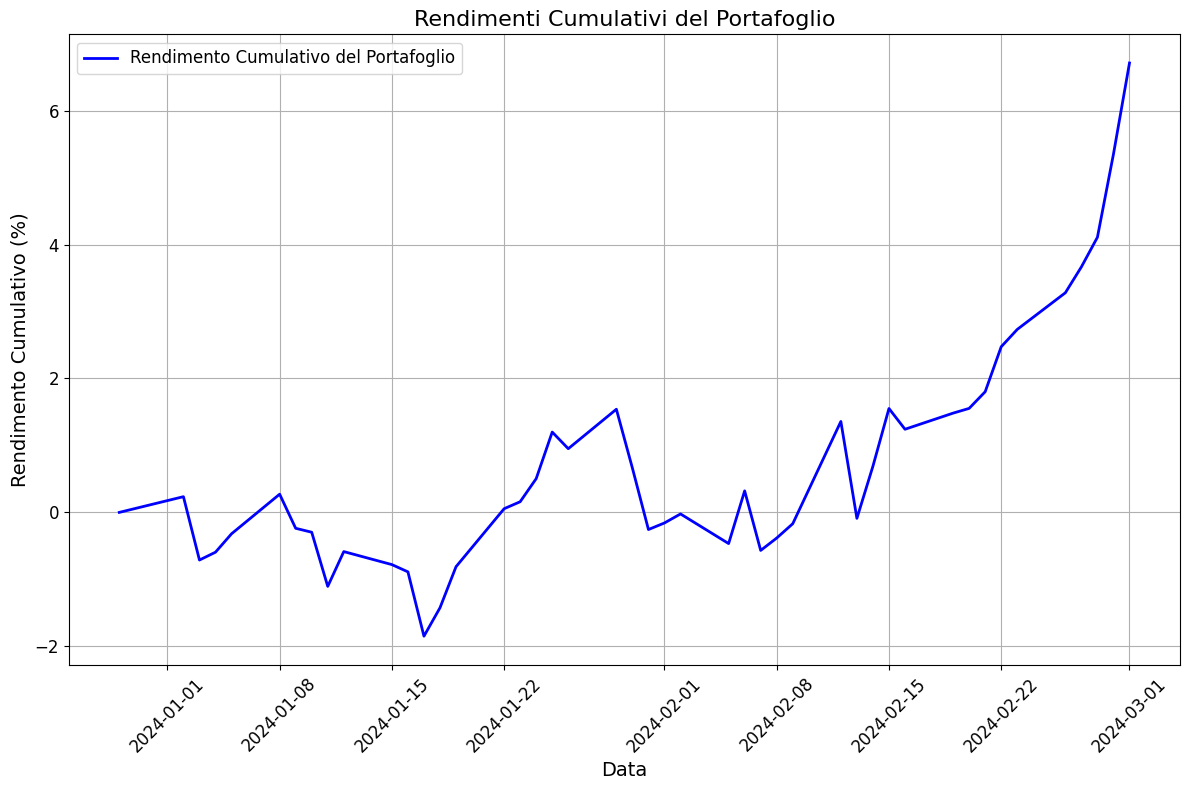

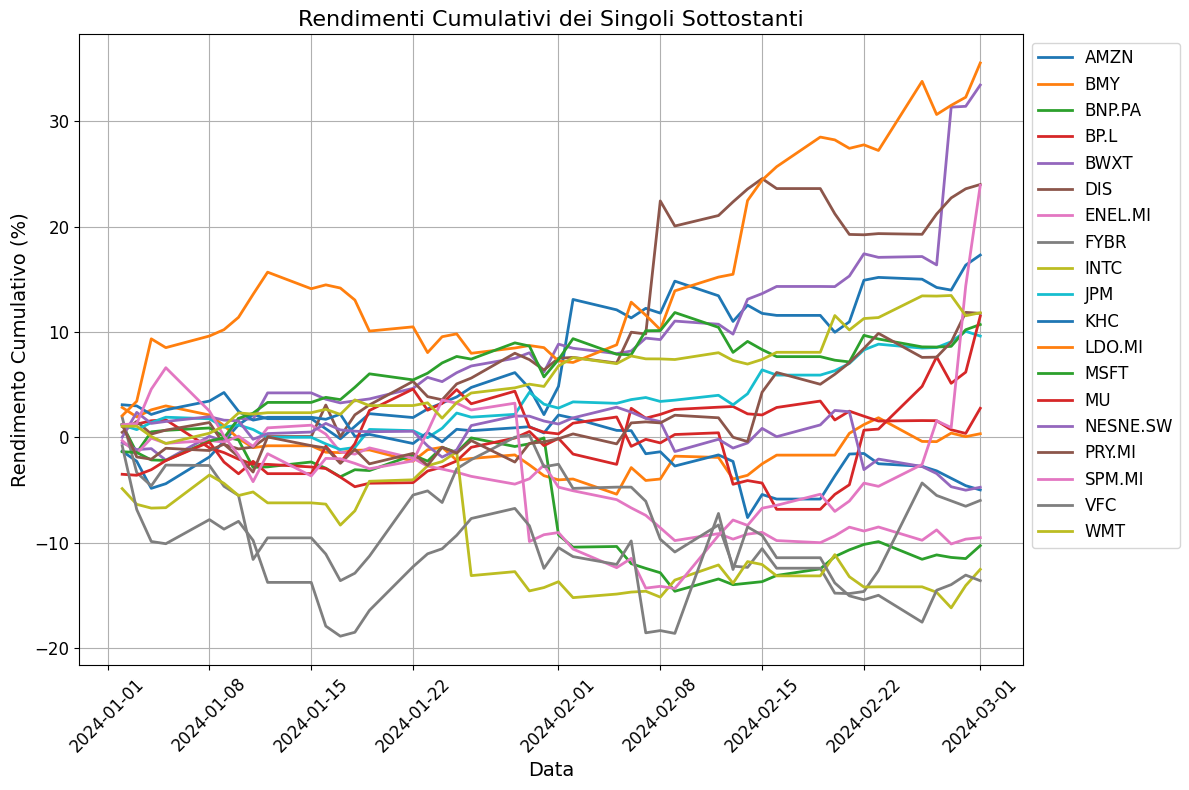

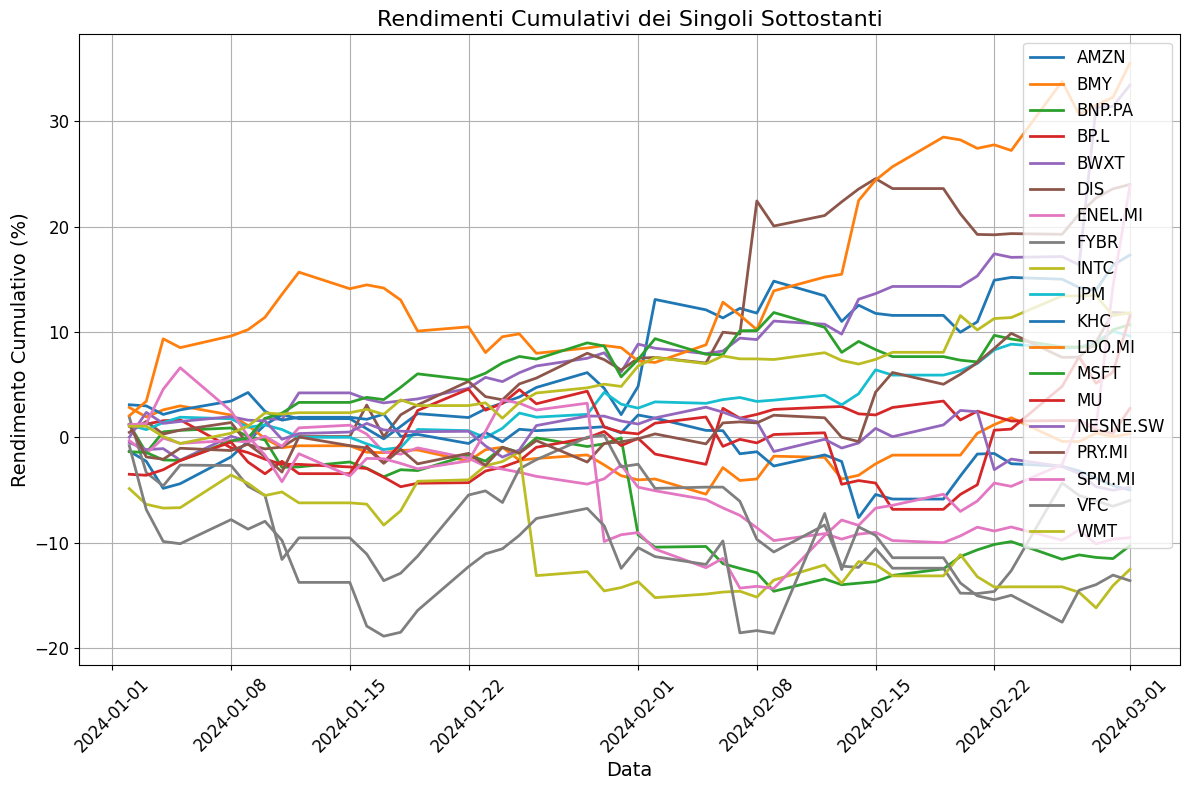

In [80]:
# Traccia il grafico dei rendimenti cumulativi del portafoglio
plt.figure(figsize=(12, 8))
plt.plot(cumulative_portfolio_returns_percent.index, cumulative_portfolio_returns_percent, color='blue', linewidth=2, label='Rendimento Cumulativo del Portafoglio')
plt.title('Rendimenti Cumulativi del Portafoglio', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Rendimento Cumulativo (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Traccia il grafico dei rendimenti cumulativi per ciascun sottostante
plt.figure(figsize=(12, 8))
for col in cumulative_returns_percent.columns:
    plt.plot(cumulative_returns_percent.index, cumulative_returns_percent[col], linewidth=2, label=col)

plt.title('Rendimenti Cumulativi dei Singoli Sottostanti', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Rendimento Cumulativo (%)', fontsize=14)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# Check Section


In [57]:
print(ticker_list)

Empty DataFrame
Columns: [AMZN, BMY, BNP.PA, BP.L, BWXT, DIS, ENEL.MI, FYBR, INTC, JPM, KHC, LDO.MI, MSFT, MU, NESNE.SW, PRY.MI, SPM.MI, VFC, WMT]
Index: []
